---

In [1]:
import pandas as pd
import scipy.stats as stats
import plotly.express as px
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Часть 1. Приоритизация гипотез.

Для начала откроем файл "hypothesis" и посмотрим типы данных. Как видно, кроме столбца с гипотезами все остальные имеют целочисленный тип данных, что в принципе объяснимо: осталььные столбцы представляют собой параметры для фреймворков ICE и RICE, которые оцениваются в удобных шкалах. Проверим также датасет на дубликаты.

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option("display.max_colwidth", -1)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis["number"] = np.arange(0, 0 + len(hypothesis))

In [6]:
hypothesis.duplicated().sum()

0

Применим для приоритизации гипотез фреймворк ICE, где Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта, Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так и Efforts — сколько стоит протестировать эту гипотезу. Как видно, наиболее перспективными являются гипотезы 8 (Запустить акцию, дающую скидку на товар в день рождения), 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).

In [7]:
hypothesis["ICE"] = ((hypothesis["Impact"] * hypothesis["Confidence"]) / hypothesis["Efforts"]).round(2)
display(hypothesis.sort_values(by="ICE", ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,number,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,6,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,5,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1.00


Но в этом случае при приоритизации гипотез мы не учитываем фактор Reach - скольких пользователей затронет желаемое изменение, поэтому мы также посчитаем фреймворк RICE. Как можно увидеть, порядок перспективных гипотез меняется; кроме того, остаются гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) и гипотеза 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), а также появляется
гипотеза 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа).

In [8]:
hypothesis["RICE"] = ((hypothesis["Reach"] * hypothesis["Impact"] * hypothesis["Confidence"]) / hypothesis["Efforts"]).round(2)
display(hypothesis.sort_values(by="RICE", ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,number,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,7,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,6,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,5,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1.00,3.0


Вывод: мы применили для приоритезации гипотез фреймворки ICE и RICE и обнаружили, что их результаты отличаются. Подобная разница объясняется тем, что RICE учитывает количество затронутых изменениями пользователей (именно поэтому гипотеза 8 сменилась на гипотезу 2).

In [9]:
hypothesis.set_index("Hypothesis")
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts,number,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,0,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,1,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,2,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,3,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,4,1.00,3.0


No handles with labels found to put in legend.


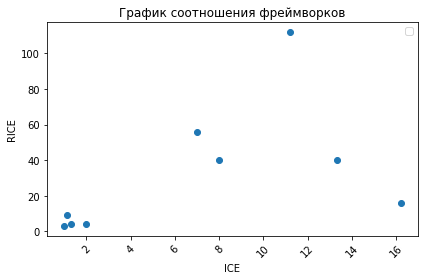

In [10]:
fig, ax = plt.subplots()
ax.scatter(hypothesis["ICE"], hypothesis["RICE"])
plt.xlabel("ICE")
plt.ylabel("RICE")
plt.title("График соотношения фреймворков")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.legend()
plt.show()
for i, txt in enumerate(hypothesis["number"]):
    ax.annotate(txt, (hypothesis["ICE"][i], hypothesis["RICE"][i]))


## Часть 2. Анализ A/B-теста

Для начала откроем файлы с заказами и посетителями. Как видно, у нас в обоих случаях есть столбец с датой, которую нужно привести к формату даты. Посмотрим на дубликаты: их нет. 

In [12]:
orders["group"].value_counts()

B    640
A    557
Name: group, dtype: int64

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders["date"] = pd.to_datetime(orders["date"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
orders.duplicated().sum()

0

In [16]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors["group"].value_counts()

B    31
A    31
Name: group, dtype: int64

In [19]:
visitors["date"] = pd.to_datetime(visitors["date"])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
visitors.duplicated().sum()

0

In [21]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим для начала, не попадают ли у нас пользователи сразу в две группы. Видим, что таких пользователей 58. В сложившейся ситуации (тест уже проведен) с ними вряд ли что можно сделать (а изначально было бы хорошо тест остановить), поэтому продолжим анализ теста с ними.

In [22]:
visitorsA = orders[orders["group"] == "A"]["visitorId"]
visitorsB = orders[orders["group"] == "B"]["visitorId"]
visitorsDup = pd.Series(np.intersect1d(visitorsA, visitorsB))
print(len(visitorsDup))

58


Соберем кумулятивные данные.

In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [24]:
datesGroups = orders[["date", "group"]].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])].agg({"date" : "max", "group" : "max", "transactionId" : pd.Series.nunique, "visitorId" : pd.Series.nunique, "revenue" : "sum"}), axis=1)
ordersAggregated = ordersAggregated.sort_values(by=["date","group"])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [25]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])].agg({"date": "max", "group": "max", "visitors": "sum"}), axis=1)
visitorsAggregated = visitorsAggregated.sort_values(by=["date", "group"])
display(visitorsAggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=["date", "group"], right_on=["date", "group"])
cumulativeData.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Строим график кумулятивной выручки по группам

Из таблицы cumulativeData образуем таблицы по выручке и по группам (А и В). Строим график и наблюдаем в целом равномерный рост выручки по обеим группам. Кроме того, видим резкий всплеск роста выручки группы В 17 августа 2019 г., что может быть связано либо с увеличением числа заказов, либо с появлением дорогостоящих заказов (т.е. с выбросами).

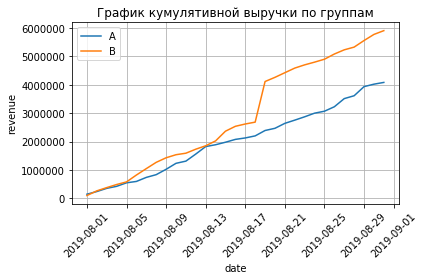

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData["group"]== "A"][["date", "revenue", "orders"]]
cumulativeRevenueB = cumulativeData[cumulativeData["group"]== "B"][["date", "revenue", "orders"]]
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"], label="A")
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"], label="B")
plt.xlabel("date")
plt.ylabel("revenue")
plt.title("График кумулятивной выручки по группам")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend() 
plt.show()

### Строим график кумулятивного среднего чека по группам

На основе уже имеющихся данных по кумулятивной выручке и числу заказов по каждой группе строим графики кумулятивного среднего чека. Кумулятивный средний чек группы В растет, но 17 августа 2019 г. видим его резкий скачок, а затем постепенное понижение. В группе А значение среднего кумулятивного чека сначала падает, потом растет и более-менее выравнивается после 9 августа 2019 г. У нас здесь опять наблюдаются резкие всплески, что также может быть связано с дорогостоящими и крупными заказами.

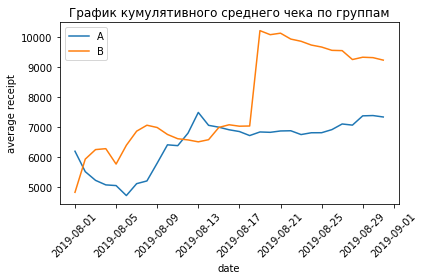

In [28]:
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"]/cumulativeRevenueA["orders"], label="A")
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"]/cumulativeRevenueB["orders"], label="B")
plt.xlabel("date")
plt.ylabel("average receipt")
plt.title("График кумулятивного среднего чека по группам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend() 
plt.show()

### Строим график относительного изменения кумулятивного среднего чека группы B к группе A

Чтобы найти относительное изменнеие кумулятивного среднего чека группы В к группе А, для начала создадим датафрейм из уже имеющихся данных по кумулятивной выручке, а затем найдем отношение средних чеков. Имеющиеся резкие изменения графика (подъем с 1 по 5 августа 2019 г., падение с 5 по 9 августа 2019 г., а затем снова резкий подъем до 17 августа 2019 г.) заставляют предположить, что в данных имеются выбросы.

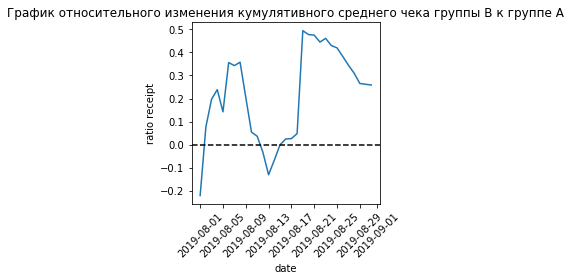

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on="date", right_on="date", how="left", suffixes=["A", "B"])
plt.plot(mergedCumulativeRevenue["date"], (mergedCumulativeRevenue["revenueB"]/mergedCumulativeRevenue["ordersB"])/(mergedCumulativeRevenue["revenueA"]/mergedCumulativeRevenue["ordersA"])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("date")
plt.ylabel("ratio receipt")
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

 ### Строим график кумулятивной конверсии по группам

Посчитаем для начала конверсию и построим графики. Видим, что кумулятивная конверсия группы В растет после 5 августа 2019 г., а кумулятивная конверсия группы А падает после 1 августа 2019 г. Можно предположить, что вариант интернет-магазина оказался удачнее, чем вариант группы А.

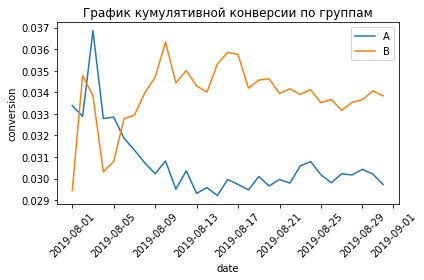

In [30]:
cumulativeData["conversion"] = cumulativeData["orders"]/cumulativeData["visitors"]
cumulativeDataA = cumulativeData[cumulativeData["group"]=="A"]
cumulativeDataB = cumulativeData[cumulativeData["group"]=="B"]
plt.plot(cumulativeDataA["date"], cumulativeDataA["conversion"], label="A")
plt.plot(cumulativeDataB["date"], cumulativeDataB["conversion"], label="B")
plt.xlabel("date")
plt.ylabel("conversion")
plt.title("График кумулятивной конверсии по группам")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.legend()
plt.show()

### Строим график относительного изменения кумулятивной конверсии группы B к группе A 

Посмотрим, как кумулятивная конверсия группы В изменялась по отношению к кумулятивной конверсии группы А. Посмтроим график и у увидим, что с 1 по 5 августа 2019 г. наблюдается спад, а затем идет рост до 13 августа 2019 г., после чего видим снова спад. По графику также видно, что группа В в ходе теста имеет лучшие показатели, чем группа А, однако отношение конверсии еще не установилось, поэтому имеет смысл посмотреть на наличие выбросов в данных.

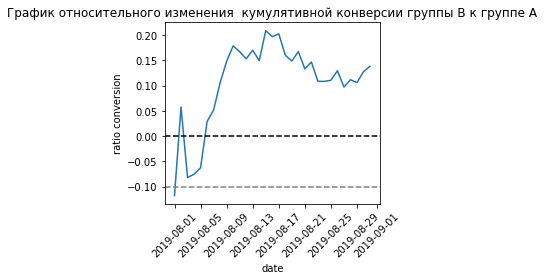

In [31]:
mergedCumulativeconversion = cumulativeDataA[["date","conversion"]].merge(cumulativeDataB[["date","conversion"]], left_on="date", right_on="date", how="left", suffixes=["A", "B"])
plt.plot(mergedCumulativeconversion["date"], mergedCumulativeconversion["conversionB"]/mergedCumulativeconversion["conversionA"] - 1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel("date")
plt.ylabel("ratio conversion")
plt.title("График относительного изменения  кумулятивной конверсии группы B к группе A")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Строим точечный график количества заказов по пользователям

Найдем для начала число заказов по пользователям, сгруппировав данные из таблицы "заказы". Построим точечный график и увидим, что подавляющее количество пользователей делает один заказ, чуть меньше - два заказа. А большее количестов заказов похоже на выбросы.

In [32]:
ordersByUsers = orders.drop(["revenue", "date", "group"], axis=1).groupby("visitorId", as_index=False).agg({"transactionId": pd.Series.nunique})
ordersByUsers.columns = ["userId","orders"]
ordersByUsers = ordersByUsers.sort_values(by="orders", ascending=False)
ordersByUsers.head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


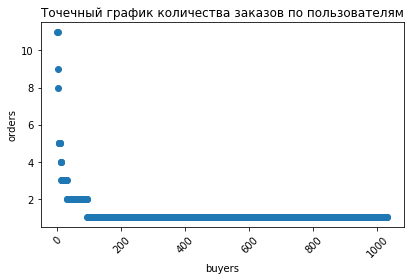

In [33]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers["orders"])
plt.xlabel("buyers")
plt.ylabel("orders")
plt.title("Точечный график количества заказов по пользователям")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

Для определения аномальных пользователей посмотрим также 90-й, 95-й и 99-й перцентили. Как видно, 90 % делают один заказ, 95 % - 2 заказа и 99 % - 4 заказа. В качестве границы для определения аномальных пользователей для надежности результатов теста установим 4 заказа, больше которых совершает заказы 1 % пользователей.

In [34]:
print(np.percentile(ordersByUsers["orders"], [90, 95, 99]))

[1. 2. 4.]


### Построим точечный график стоимостей заказов. 

Посмотрим на стоимость заказов. Как видно на графике, в основном стоимость заказов не превышает 25 000 у.е., хотя есть и отдельные выбросы

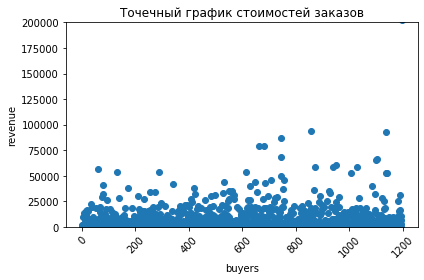

In [35]:
x_values = pd.Series(range(0, len(orders["revenue"])))
plt.scatter(x_values, orders["revenue"])
plt.xlabel("buyers")
plt.ylabel("revenue")
plt.ylim(0, 200000)
plt.title("Точечный график стоимостей заказов")
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

Для более точного выяснения границы для аномальных пользователей, посчитаем 90-й, 95-й и 99-й перцентили стоимости заказов. Обнаруживаем, что 90 % стоимости заказов менее 18 168 у.е., а 95 - 28 000 у.е. 99-й перцентиль равен 58 233,2 у.е. Как и в случае с количеством заказа, примем за точку отсчета 99-й перцентиль и проведем границу для определения аномальных пользователей по сумуме 58 233,2 у.е.

In [36]:
print(np.percentile(orders["revenue"], [90, 95, 99]))

[18168.  28000.  58233.2]


### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Сформулируем нулевую и альтернативную гипотезу. Нулевая: в сырых данных нет различий в конверсии между группами.
Альтернативная: в сырых данных есть различия в конверсии между группами. Уровень значимости: 0,01. В качестве типа альтернативной гипотезы выбираем "двусторонний".

Подготовим данные для анализа. Посчитаем количество посетителей и покупателей в обеих группах по датам. Сгруппируем сначала посететилей по датам в отдельную таблицу, а затем найдем их совокупное количество. Аналогично поступаем в отношении тех, кто делал заказы, только суммируем у них также и выручку.

In [37]:
visitorsADaily = visitors[visitors["group"] == "A"][["date", "visitors"]]
visitorsADaily.columns=["date", "visitors_per_date_A"]

In [38]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily["date"] <= x["date"]].agg({"date":"max", "visitors_per_date_A": "sum"}),axis=1)
visitorsACummulative.columns = ["date", "visitors_Cummulative_A"]
visitorsACummulative.head()

,date,visitors_Cummulative_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [39]:
visitorsBDaily = visitors[visitors["group"] == "B"][["date", "visitors"]]
visitorsBDaily.columns=["date", "visitors_per_date_B"]

In [40]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily["date"] <= x["date"]].agg({"date":"max", "visitors_per_date_B": "sum"}),axis=1)
visitorsBCummulative.columns = ["date", "visitors_Cummulative_B"]
visitorsBCummulative.head()

,date,visitors_Cummulative_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [41]:
ordersADaily = (orders[orders["group"] == "A"][["date", "transactionId", "visitorId", "revenue"]].groupby("date", as_index=False).agg({"transactionId": pd.Series.nunique, "revenue": "sum"}))
ordersADaily.columns=["date", "orders_per_date_A", "revenue_per_date_A"]

In [42]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily["date"] <= x["date"]].agg({"date": "max", "orders_per_date_A": "sum", "revenue_per_date_A": "sum"}), axis=1)
ordersACummulative = ordersACummulative.sort_values(by=["date"])
ordersACummulative.columns = ["date", "orders_Cummulative_A", "revenue_Cummulative_A"]
ordersACummulative.head()

,date,orders_Cummulative_A,revenue_Cummulative_A
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [43]:
ordersBDaily = (orders[orders["group"] == "B"][["date", "transactionId", "visitorId", "revenue"]].groupby("date", as_index=False).agg({"transactionId": pd.Series.nunique, "revenue": "sum"}))
ordersBDaily.columns=["date", "orders_per_date_B", "revenue_per_date_B"]

In [44]:
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily["date"] <= x["date"]].agg({"date": "max", "orders_per_date_B": "sum", "revenue_per_date_B": "sum"}), axis=1)
ordersBCummulative = ordersBCummulative.sort_values(by=["date"])
ordersBCummulative.columns = ["date", "orders_Cummulative_B", "revenue_Cummulative_B"]
ordersBCummulative.head()

,date,orders_Cummulative_B,revenue_Cummulative_B
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Объединим получившиеся таблицы в одну.

In [45]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on="date", right_on="date", how="left"
    )
    .merge(ordersACummulative, left_on="date", right_on="date", how="left")
    .merge(ordersBCummulative, left_on="date", right_on="date", how="left")
    .merge(visitorsADaily, left_on="date", right_on="date", how="left")
    .merge(visitorsBDaily, left_on="date", right_on="date", how="left")
    .merge(visitorsACummulative, left_on="date", right_on="date", how="left")
    .merge(visitorsBCummulative, left_on="date", right_on="date", how="left")
)
display(data.head())

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_Cummulative_A,revenue_Cummulative_A,orders_Cummulative_B,revenue_Cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_Cummulative_A,visitors_Cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Приступим к подсчету статистической значимости различия конверсии в группах. Полученное p-value (0,017) больше уровня значимости, который мы задали как 0,01, поэтому нулевую гипотезу мы не отвергаем. И видим, что в сырых данных отсутствуют различия в конверсии между группами А и В. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

In [46]:
ordersByUsersA = orders[orders["group"] == "A"].groupby("visitorId", as_index=False).agg({"transactionId": pd.Series.nunique})
ordersByUsersA.columns = ["visitor_Id", "orders"]
ordersByUsersB = orders[orders["group"] == "B"].groupby("visitorId", as_index=False).agg({"transactionId": pd.Series.nunique})
ordersByUsersB.columns = ["visitor_Id", "orders"]

In [47]:
sampleA = pd.concat([ordersByUsersA["orders"], pd.Series(0, index=np.arange(data["visitors_per_date_A"].sum() - len(ordersByUsersA["orders"])), name="orders")], axis=0)
sampleB = pd.concat([ordersByUsersB["orders"], pd.Series(0, index=np.arange(data["visitors_per_date_B"].sum() - len(ordersByUsersB["orders"])), name="orders")], axis=0)

In [58]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, True, "two-sided")[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем нулевую и альтернативную гипотезу. Нулевая: в сырых данных нет различий в среднем чеке  между группами.
Альтернативная: в сырых данных есть различия в среднем чеке между группами. Уровень значимости: 0,01. В качестве типа альтернативной гипотезы выбираем "двусторонний".

Найдем статистическую значимость различий в среднем чеке заказа. Получившееся значение p-value (0,729) значительно больше уровня значимости (0,01), поэтому мы не отвергаем нулевую гипотезу об отсутствии различий в среднем чеке между группами. Однако, как видно, средний чек группы В выше, чем средний чек группы А на 25,9%.

In [49]:
receiptA = orders[orders["group"]=="A"]["revenue"]
receiptB = orders[orders["group"]=="B"]["revenue"]

In [59]:
print("{0:.3f}".format(stats.mannwhitneyu(receiptA, receiptB, True, "two-sided")[1]))
print("{0:.3f}".format(receiptB.mean()/receiptA.mean()-1)) 

0.729
0.259


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезу. Нулевая: в очищенных данных нет различий в конверсии между группами.
Альтернативная: в очищенных данных есть различия в конверсии между группами. Уровень значимости: 0,01. В качестве типа альтернативной гипотезы выбираем "двусторонний".

Предыдущие вычисления мы делали по "сырым" данным, т.е. данным с выбросами. Попробуем эти выбросы убрать. Ранее мы определили, что пользователи с более, чем 4 заказами и заказавшие более, чем на 58 233,2 у.е. Аномальных пользователей у нас всего 15 человек.

In [51]:
usersWithTooManyorders = pd.concat([ordersByUsersA[ordersByUsersA["orders"] > 4]["visitor_Id"], ordersByUsersB[ordersByUsersB["orders"] > 4]["visitor_Id"]], axis=0)

In [52]:
usersWithTooExpensiveorders = orders[orders["revenue"] > 58233]["visitorId"]

In [53]:
anormalUsers = pd.concat([usersWithTooManyorders, usersWithTooExpensiveorders], axis=0).drop_duplicates().sort_values()
print(anormalUsers.shape)

(15,)


Построим выборки с очищенными данными. Применим критерий Манна-Уитни и обнаружим, что получившееся значение p-value (0,014) больше уровня значимости (0,01). Соответственно, нулевую гипотезу мы не отвергаем: различий в конверсии между группами сохраняются и в очищенных данных нет. Относительный прирост конверсии группы В к конверсии группы А равен 15,3%. Получается, что результаты в отношении конверсии практически не изменились.

In [54]:
sampleAFilt = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA["visitor_Id"].isin(anormalUsers))]["orders"], pd.Series(0, index=np.arange(data["visitors_per_date_A"].sum() - len(ordersByUsersA["orders"])), name="orders")], axis=0)
sampleBFilt = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB["visitor_Id"].isin(anormalUsers))]["orders"], pd.Series(0, index=np.arange(data["visitors_per_date_B"].sum() - len(ordersByUsersB["orders"])), name="orders")], axis=0)

In [60]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFilt, sampleBFilt, True, "two-sided")[1]))
print("{0:.3f}".format(sampleBFilt.mean() / sampleAFilt.mean() - 1))

0.014
0.153


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем нулевую и альтернативную гипотезу. Нулевая: в очищенных данных нет различий в среднем чеке между группами.
Альтернативная: в очищенных данных есть различия в среднем чеке между группами. Уровень значимости: 0,01. В качестве типа альтернативной гипотезы выбираем "двусторонний".

Уберем из данных выбросы и применим критерий Манна-Уитни. Получившееся значение p-value (0,851) больше уровня значимости (0,01). Следовательно, нулевую гипотезу мы не отвергаем: различия в среднем чеке заказа между группами статистически не значимы. При этом по очищенным данным обнаружилось, что средний чек группы В меньше среднего чека группы А на 0,6 %.

In [56]:
receiptAFilt = orders[np.logical_and(orders["group"]=="A", np.logical_not(orders["visitorId"].isin(anormalUsers)))]["revenue"]
receiptBFilt = orders[np.logical_and(orders["group"]=="B", np.logical_not(orders["visitorId"].isin(anormalUsers)))]["revenue"]

In [61]:
print("{0:.3f}".format(stats.mannwhitneyu(receiptAFilt, receiptBFilt, True, "two-sided")[1]))
print("{0:.3f}".format(receiptBFilt.mean()/receiptAFilt.mean()-1)) 

0.851
-0.006


### Принимаем решение по результатам теста.

Вывод: 
Посмотрим на статистическую значимость различия конверсии в группах по сырым и очищенным данным. По результатам теста видим, что в данных различий в конверсии нет, а конверсия группы В стабильно превышает конверсию группы А.
Ситуация сложнее со статистической значимостью различий в среднем чеке заказа. По результатам теста видим, что в среднем чеке между группами различия отсутствуют. Тем не менее, после очистки данных видим, что средний чек группы В меньше среднего чека группы А на менее, чем 1 %.
В сложившейся ситуации, когда данные указывают на отсутствие различий, не имеет смысл продолжить тест.